<a href="https://colab.research.google.com/github/matthewpecsok/mnist_cnn/blob/main/mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import keras as keras
from keras.utils import to_categorical
import numpy as np
import pandas as pd

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
x_train = x_train.reshape(60000,28,28,1)
x_train.shape

(60000, 28, 28, 1)

In [5]:
x_train.shape

(60000, 28, 28, 1)

In [6]:
x_train[1,].shape

(28, 28, 1)

In [7]:
# fig = plt.figure
# plt.imshow(x_train[1,] , cmap='gray')
# plt.show()



In [8]:
model = keras.models.Sequential()


In [9]:
#model.add(keras.layers.Dense(512,activation=keras.activations.relu,))
model.add(keras.layers.Conv2D(32,(3,3),activation=tf.keras.activations.relu,input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64,(3,3),activation=tf.keras.activations.relu))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64,(3,3),activation=tf.keras.activations.relu))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64,activation=keras.activations.relu))
model.add(keras.layers.Dense(10,activation=keras.activations.softmax))

In [10]:
model.compile(optimizer=keras.optimizers.Adam(),loss=keras.losses.categorical_crossentropy,metrics='accuracy')

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [12]:
x_test.shape

(10000, 28, 28)

In [13]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [14]:
# print(x_train.shape)
# x_train = x_train.reshape((60000,28*28))
# x_test = x_test.reshape((10000,28*28))
# print(x_train.shape)

In [15]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [16]:
x_train.shape

(60000, 28, 28, 1)

In [17]:
model.fit(x_train,y_train,epochs=5,verbose=1,validation_split=0.2,batch_size=64)

Epoch 1/5
750/750 [==============================] - 10s 4ms/step - loss: 0.4936 - accuracy: 0.8475 - val_loss: 0.0774 - val_accuracy: 0.9774
Epoch 2/5
750/750 [==============================] - 3s 3ms/step - loss: 0.0593 - accuracy: 0.9819 - val_loss: 0.0472 - val_accuracy: 0.9855
Epoch 3/5
750/750 [==============================] - 3s 3ms/step - loss: 0.0410 - accuracy: 0.9866 - val_loss: 0.0423 - val_accuracy: 0.9871
Epoch 4/5
750/750 [==============================] - 3s 3ms/step - loss: 0.0292 - accuracy: 0.9910 - val_loss: 0.0381 - val_accuracy: 0.9890
Epoch 5/5
750/750 [==============================] - 3s 3ms/step - loss: 0.0224 - accuracy: 0.9925 - val_loss: 0.0377 - val_accuracy: 0.9871


In [18]:
x_single = x_test[1,]

In [19]:
np.array(x_single).shape

(28, 28)

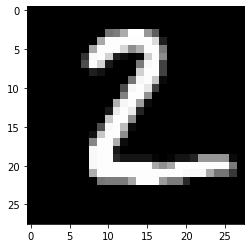

In [20]:
fig = plt.figure
plt.imshow(x_test[1,].reshape(28,28) , cmap='gray')
plt.show()


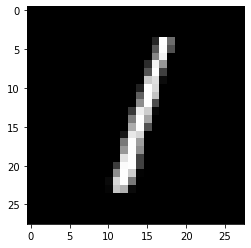

In [27]:
fig = plt.figure
plt.imshow(x_test[2,].reshape(28,28) , cmap='gray')
plt.show()

In [25]:
pd.DataFrame(model.predict(np.array([x_test[1,].reshape(28,28,1)])))

,0,1,2,3,4,5,6,7,8,9
0,0.000013,8.468201e-07,0.999985,5.040657e-09,3.493430e-07,4.010585e-12,3.304369e-09,1.730803e-10,5.750958e-09,4.650979e-11


In [26]:
pd.DataFrame(model.predict(np.array([x_test[2,].reshape(28,28,1)])))

,0,1,2,3,4,5,6,7,8,9
0,0.000009,0.998891,0.000001,3.354166e-08,0.000975,0.000001,0.000007,0.000015,0.000099,0.000003


In [ ]:
test_preds = model.predict(x_test)

In [ ]:
y_test

In [ ]:
df = pd.DataFrame({'pred':np.argmax(test_preds,axis=-1),'real':np.argmax(y_test,axis=-1)})
df

In [ ]:
df['correct']=df['pred']==df['real']

In [ ]:
df['correct'].value_counts()

In [ ]:
df.groupby(['correct']).agg({'correct': 'count'}).apply(lambda x: 100 * x / float(x.sum()))

In [28]:
model.save('/content/drive/MyDrive/Colab Notebooks/mnist/mnist_cnn_multiclass_model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/mnist/mnist_cnn_multiclass_model/assets
